# Libraries

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

# Load dataset

In [45]:
# Load dataset
df = pd.read_csv('astronaut_health_data.csv')

# Encode categorical variables

In [46]:
# Encode categorical variables
label_cols = ['Gender', 'Country', 'Vision_Change', 'Countermeasures_Used']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Astronaut_ID                     75 non-null     int64  
 1   Name                             75 non-null     object 
 2   Age_at_Mission_Start             75 non-null     int64  
 3   Gender                           75 non-null     int64  
 4   Country                          75 non-null     int64  
 5   Mission_Duration (days)          75 non-null     int64  
 6   Number_of_Missions               75 non-null     int64  
 7   Bone_Density_Loss (%)            75 non-null     float64
 8   Muscle_Mass_Loss (%)             75 non-null     float64
 9   Radiation_Exposure (mSv)         75 non-null     int64  
 10  Cardiovascular_Risk_Score        75 non-null     int64  
 11  Immune_Response_Suppression (%)  75 non-null     float64
 12  Psychological_Impact_Sco

#  Data Visualization

# 1. Heatmap (Correlation)

Text(0.5, 1.0, 'Correlation Heatmap')

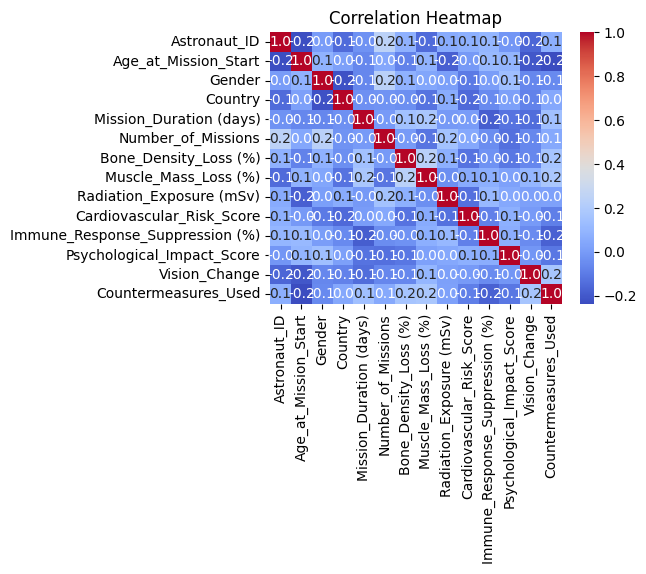

In [47]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
numeric_df = df.select_dtypes(include='number')  # filter only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.title("Correlation Heatmap")


# 2. Histogram of Age

Text(0.5, 1.0, 'Age at Mission Start')

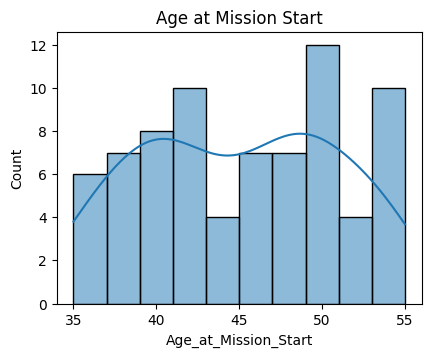

In [48]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 2)
sns.histplot(df['Age_at_Mission_Start'], bins=10, kde=True)
plt.title("Age at Mission Start")

# 3. Bar plot: Vision Change vs Psychological Score

Text(0.5, 1.0, 'Vision Change vs Psychological Impact')

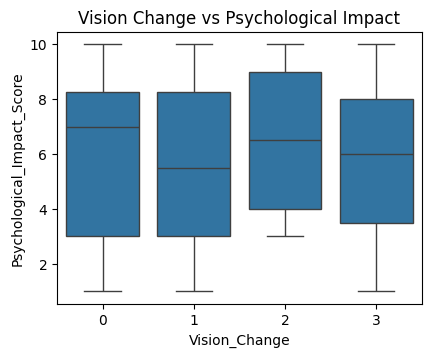

In [49]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 3)
sns.boxplot(x='Vision_Change', y='Psychological_Impact_Score', data=df)
plt.title("Vision Change vs Psychological Impact")

# 4. Radiation vs Bone Density

Text(0.5, 1.0, 'Radiation vs Bone Loss')

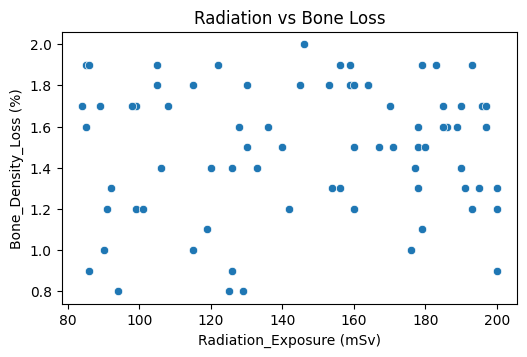

In [50]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 4)
sns.scatterplot(x='Radiation_Exposure (mSv)', y='Bone_Density_Loss (%)', data=df)
plt.title("Radiation vs Bone Loss")

# 5. Mission Duration vs Muscle Mass Loss

Text(0.5, 1.0, 'Mission Duration vs Muscle Loss')

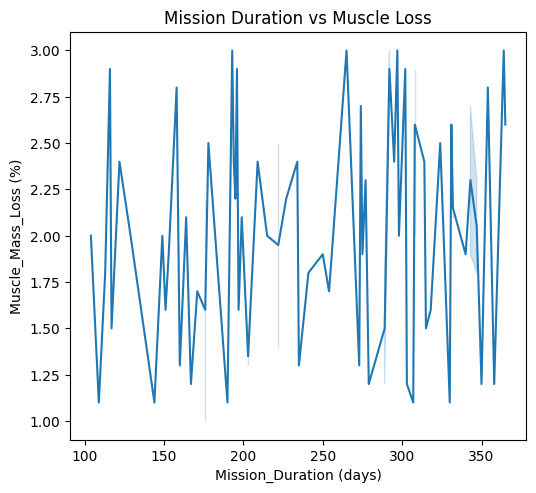

In [51]:
plt.figure(figsize=(20, 18))
plt.subplot(3, 3, 5)
sns.lineplot(x='Mission_Duration (days)', y='Muscle_Mass_Loss (%)', data=df)
plt.title("Mission Duration vs Muscle Loss")


# 6. Gender distribution

Text(0.5, 1.0, 'Gender Count')

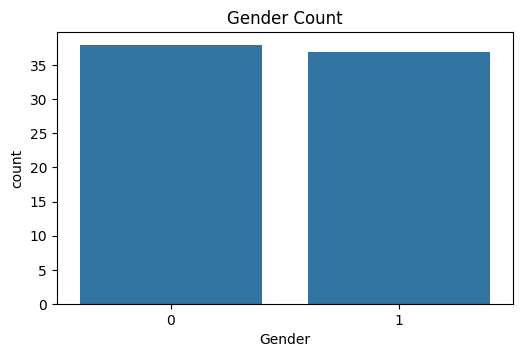

In [52]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 6)
sns.countplot(x='Gender', data=df)
plt.title("Gender Count")

# 7. Psychological Score Distribution

Text(0.5, 1.0, 'Psychological Score')

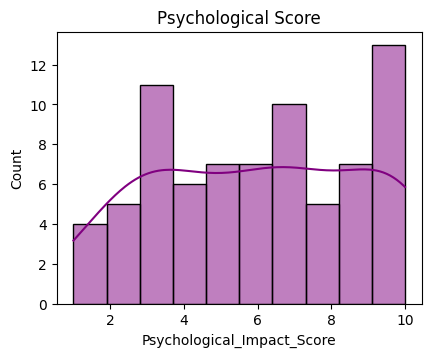

In [53]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 7)
sns.histplot(df['Psychological_Impact_Score'], bins=10, kde=True, color='purple')
plt.title("Psychological Score")

# 8. Boxplot of Immune Suppression

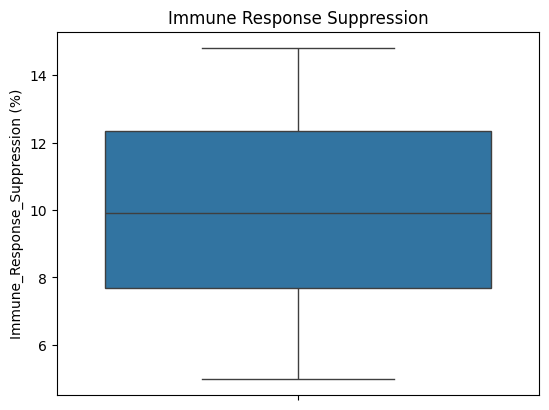

In [54]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 8)
sns.boxplot(y='Immune_Response_Suppression (%)', data=df)
plt.title("Immune Response Suppression")

plt.tight_layout()
plt.show()

# Machine Learning

In [55]:
# Preprocessing
X = df.drop(['Psychological_Impact_Score', 'Name', 'Astronaut_ID'], axis=1)
y_class = (df['Psychological_Impact_Score'] > 5).astype(int)  # Binary classification
y_reg = df['Bone_Density_Loss (%)']  # Regression target
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1.  Random Forest

In [56]:
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train_class)
pred1 = clf1.predict(X_test)
print("\n Random Forest Classification Report:\n", classification_report(y_test_class, pred1))


 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.67      0.60      0.63        10

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15



# 2.  Decision Tree

In [57]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train_class)
pred2 = clf2.predict(X_test)
print("\n Decision Tree Accuracy:", accuracy_score(y_test_class, pred2))


 Decision Tree Accuracy: 0.5333333333333333


# 3. Regression: Linear Regression

In [58]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train_reg)
pred_reg1 = reg1.predict(X_test)
print("\n Linear Regression MSE:", mean_squared_error(y_test_reg, pred_reg1))


 Linear Regression MSE: 1.2161605622157266e-31


# 4. Regression: Support Vector Regressor

In [59]:
reg2 = SVR()
reg2.fit(X_train, y_train_reg)
pred_reg2 = reg2.predict(X_test)
print("\n SVR MSE:", mean_squared_error(y_test_reg, pred_reg2))


 SVR MSE: 0.022293101559092275



# User Input Prediction


Full Fill requirements of Model by it takes input from User

In [60]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_gender.fit(df['Gender'])

le_country = LabelEncoder()
le_country.fit(df['Country'])

le_vision = LabelEncoder()
le_vision.fit(df['Vision_Change'])

le_cm = LabelEncoder()
le_cm.fit(df['Countermeasures_Used'])


LabelEncoder()

# Helper input functions

In [61]:

def get_valid_input(prompt, valid_options, encoder=None):
    while True:
        user_input = input(prompt).strip()
        if encoder:
            try:
                return encoder.transform([user_input])[0]
            except:
                print(f" Invalid input. Valid options are: {list(encoder.classes_)}")
        elif user_input in valid_options:
            return user_input
        else:
            print(f" Invalid input. Valid options are: {valid_options}")

def get_valid_numeric_input(prompt, cast_type=float, min_val=None, max_val=None):
    while True:
        try:
            val = cast_type(input(prompt))
            if (min_val is not None and val < min_val) or (max_val is not None and val > max_val):
                print(f" Please enter a value between {min_val} and {max_val}.")
                continue
            return val
        except ValueError:
            print(" Invalid number. Try again.")

Input Variable : Make sure all input in an numeric Value




And if any parameter have 2-3 options then enter your input like : 1,2,3,4





In [74]:
user_input_dict = {
    'Age_at_Mission_Start': get_valid_numeric_input("Enter Age at Mission Start: ", int, 18, 75),
    'Gender': get_valid_input("Enter Gender (Male/Female): ", None, le_gender),
    'Country': get_valid_input("Enter Country (e.g., India, USA): ", None, le_country),
    'Mission_Duration (days)': get_valid_numeric_input("Enter Mission Duration in days: ", int, 1),
    'Number_of_Missions': get_valid_numeric_input("Enter Number of Missions: ", int, 0),
    'Muscle_Mass_Loss (%)': get_valid_numeric_input("Enter Muscle Mass Loss (%): ", float, 0.0, 100.0),
    'Radiation_Exposure (mSv)': get_valid_numeric_input("Enter Radiation Exposure (mSv): ", int, 0),
    'Cardiovascular_Risk_Score': get_valid_numeric_input("Enter Cardiovascular Risk Score (1-10): ", int, 1, 10),
    'Immune_Response_Suppression (%)': get_valid_numeric_input("Enter Immune Suppression (%): ", float, 0.0, 100.0),
    'Vision_Change': get_valid_input("Enter Vision Change (Clear, Mild, Moderate, Severe): ", None, le_vision),
    'Countermeasures_Used': get_valid_input("Enter Countermeasures Used (e.g., Exercise, Vitamin D): ", None, le_cm)
}

Enter Age at Mission Start: 20
Enter Gender (Male/Female): 2
 Invalid input. Valid options are: [np.int64(0), np.int64(1)]
Enter Gender (Male/Female): 1
Enter Country (e.g., India, USA): 2
Enter Mission Duration in days: 50
Enter Number of Missions: 1
Enter Muscle Mass Loss (%): 0
Enter Radiation Exposure (mSv): 0
Enter Cardiovascular Risk Score (1-10): 1
Enter Immune Suppression (%): 0
Enter Vision Change (Clear, Mild, Moderate, Severe): 1
Enter Countermeasures Used (e.g., Exercise, Vitamin D): 1


# Step 1: Convert input dict to DataFrame

In [75]:
import pandas as pd
user_df = pd.DataFrame([user_input_dict])

# Step 1.5: Add dummy column if needed

In [76]:
if 'Bone_Density_Loss (%)' in scaler.feature_names_in_:
    user_df['Bone_Density_Loss (%)'] = 0

#  Step 2: Ensure correct column order for scaler

In [77]:
user_df = user_df[scaler.feature_names_in_]


# Step 3: Preprocess

In [78]:
user_scaled = scaler.transform(user_df)

# Step 4: Predict


In [79]:
class_result = clf1.predict(user_scaled)[0]
reg_result = reg1.predict(user_scaled)[0]

In [81]:
# Classification interpretation
risk_status = " High Risk" if class_result == 1 else " Low Risk"


In [82]:
# Regression interpretation
bone_loss_level = ""
if reg_result < 2:
    bone_loss_level = " Minimal"
elif reg_result < 5:
    bone_loss_level = " Moderate"
else:
    bone_loss_level = " Severe"

In [83]:
# Feedback based on some input thresholds
recommendations = []
if user_input_dict['Radiation_Exposure (mSv)'] > 200:
    recommendations.append(" High radiation exposure detected — recommend shielding or reduced exposure time.")
if user_input_dict['Immune_Response_Suppression (%)'] > 40:
    recommendations.append(" Significant immune suppression — consider immune-supportive countermeasures.")
if user_input_dict['Muscle_Mass_Loss (%)'] > 25:
    recommendations.append(" High muscle mass loss — increase in-flight resistance exercises is advised.")
if user_input_dict['Cardiovascular_Risk_Score'] >= 7:
    recommendations.append(" Elevated cardiovascular risk — close monitoring is recommended.")

# === Output Section ===


In [84]:
print("\n===  Astronaut Health Risk Prediction ===")
print(f" Predicted Psychological Impact: {risk_status}")
print(f" Predicted Bone Density Loss: {reg_result:.2f}% ({bone_loss_level})")

if recommendations:
    print("\n Personalized Recommendations:")
    for tip in recommendations:
        print(f"- {tip}")
else:
    print("\n Overall assessment appears within normal limits.")


===  Astronaut Health Risk Prediction ===
 Predicted Psychological Impact:  High Risk
 Predicted Bone Density Loss: -0.00% ( Minimal)

 Overall assessment appears within normal limits.
